Problem Formulation: The project aims to develop a neural network-based robust and scalable  image classification model that can accurately classify images into predefined categories with high accuracy, minimal misclassifications.

Packages and data

In [1]:
# Import Libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras

# Hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Upload data
from tensorflow.keras.datasets import fashion_mnist
fashion = keras.datasets.fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [3]:
# Class labels for Fashion MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Exploratory data analysis

In [4]:

# Print dataset information
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


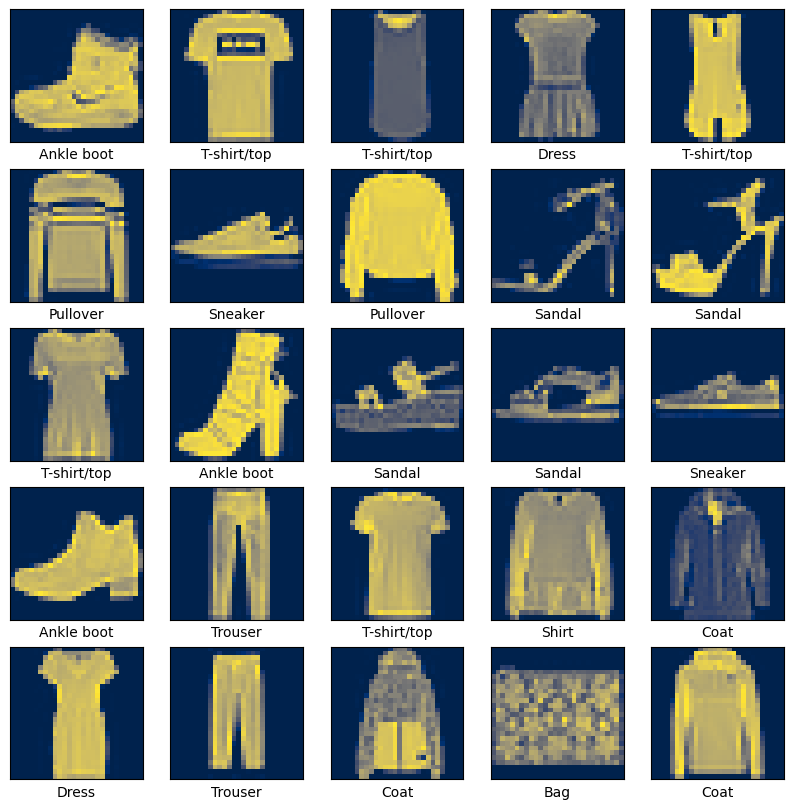

In [16]:
# Visualize Sample Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='cividis')
    plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [6]:
# Class Distribution
class_distribution = np.bincount(train_labels)
for i, count in enumerate(class_distribution):
    print(f"Class {i} ({class_labels[i]}): {count} samples")

Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


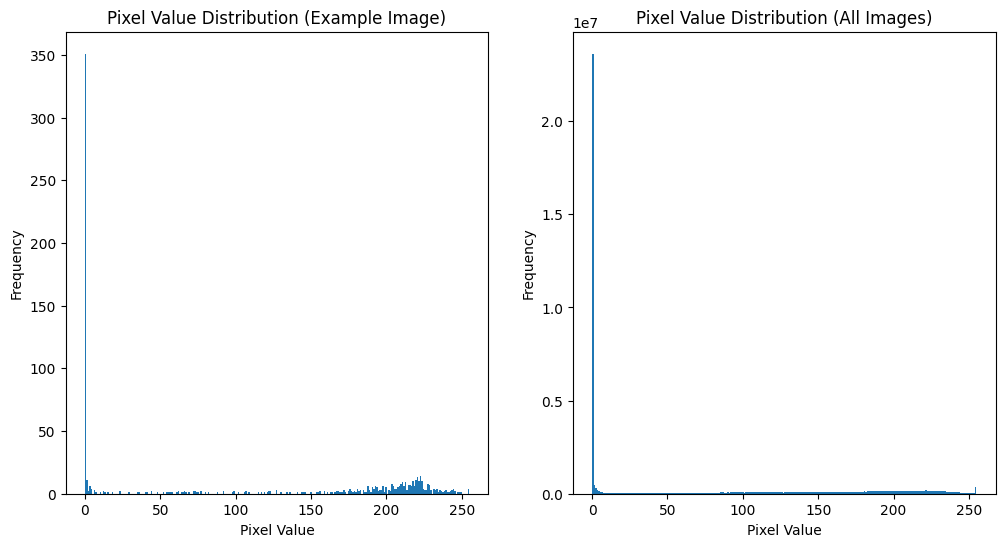

In [7]:
# Pixel Value Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_images[0].ravel(), bins=256, range=(0, 255))
plt.title("Pixel Value Distribution (Example Image)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(train_images.ravel(), bins=256, range=(0, 255))
plt.title("Pixel Value Distribution (All Images)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

Preprocessing

In [8]:
# normalize the data
# ==================

train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

# shape of training and test dataset
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model Development

In [10]:
from tensorflow.keras import layers, models

# Define your CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten layer
model.add(layers.Flatten())

# Dense layers (fully connected layers)
# Hidden layer
model.add(layers.Dense(128, activation='relu'))
# Output Layers
model.add(layers.Dense(10, activation='softmax'))  # Adjust the output size to match the number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Display the model summary to show the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [11]:
# Train data for one cycle
history = model.fit(train_images, train_labels, batch_size = 128, epochs = 3, verbose = 1, 
                validation_data = (test_images, test_labels))

Epoch 1/3
469/469 [==============================] - 52s 107ms/step - loss: 0.5693 - accuracy: 0.7910 - val_loss: 0.4255 - val_accuracy: 0.8428
Epoch 2/3
469/469 [==============================] - 53s 113ms/step - loss: 0.3477 - accuracy: 0.8741 - val_loss: 0.3591 - val_accuracy: 0.8724
Epoch 3/3
469/469 [==============================] - 49s 104ms/step - loss: 0.2931 - accuracy: 0.8931 - val_loss: 0.3025 - val_accuracy: 0.8913


Validation

In [12]:
# Evaluate the model for tain loss and accuracy
from tensorflow.keras.models import load_model
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=2)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Training loss: {train_loss:.4f}")

1875/1875 - 14s - loss: 0.2620 - accuracy: 0.9042 - 14s/epoch - 7ms/step
Training accuracy: 90.42%
Training loss: 0.2620


1/1 [==============================] - 0s 191ms/step


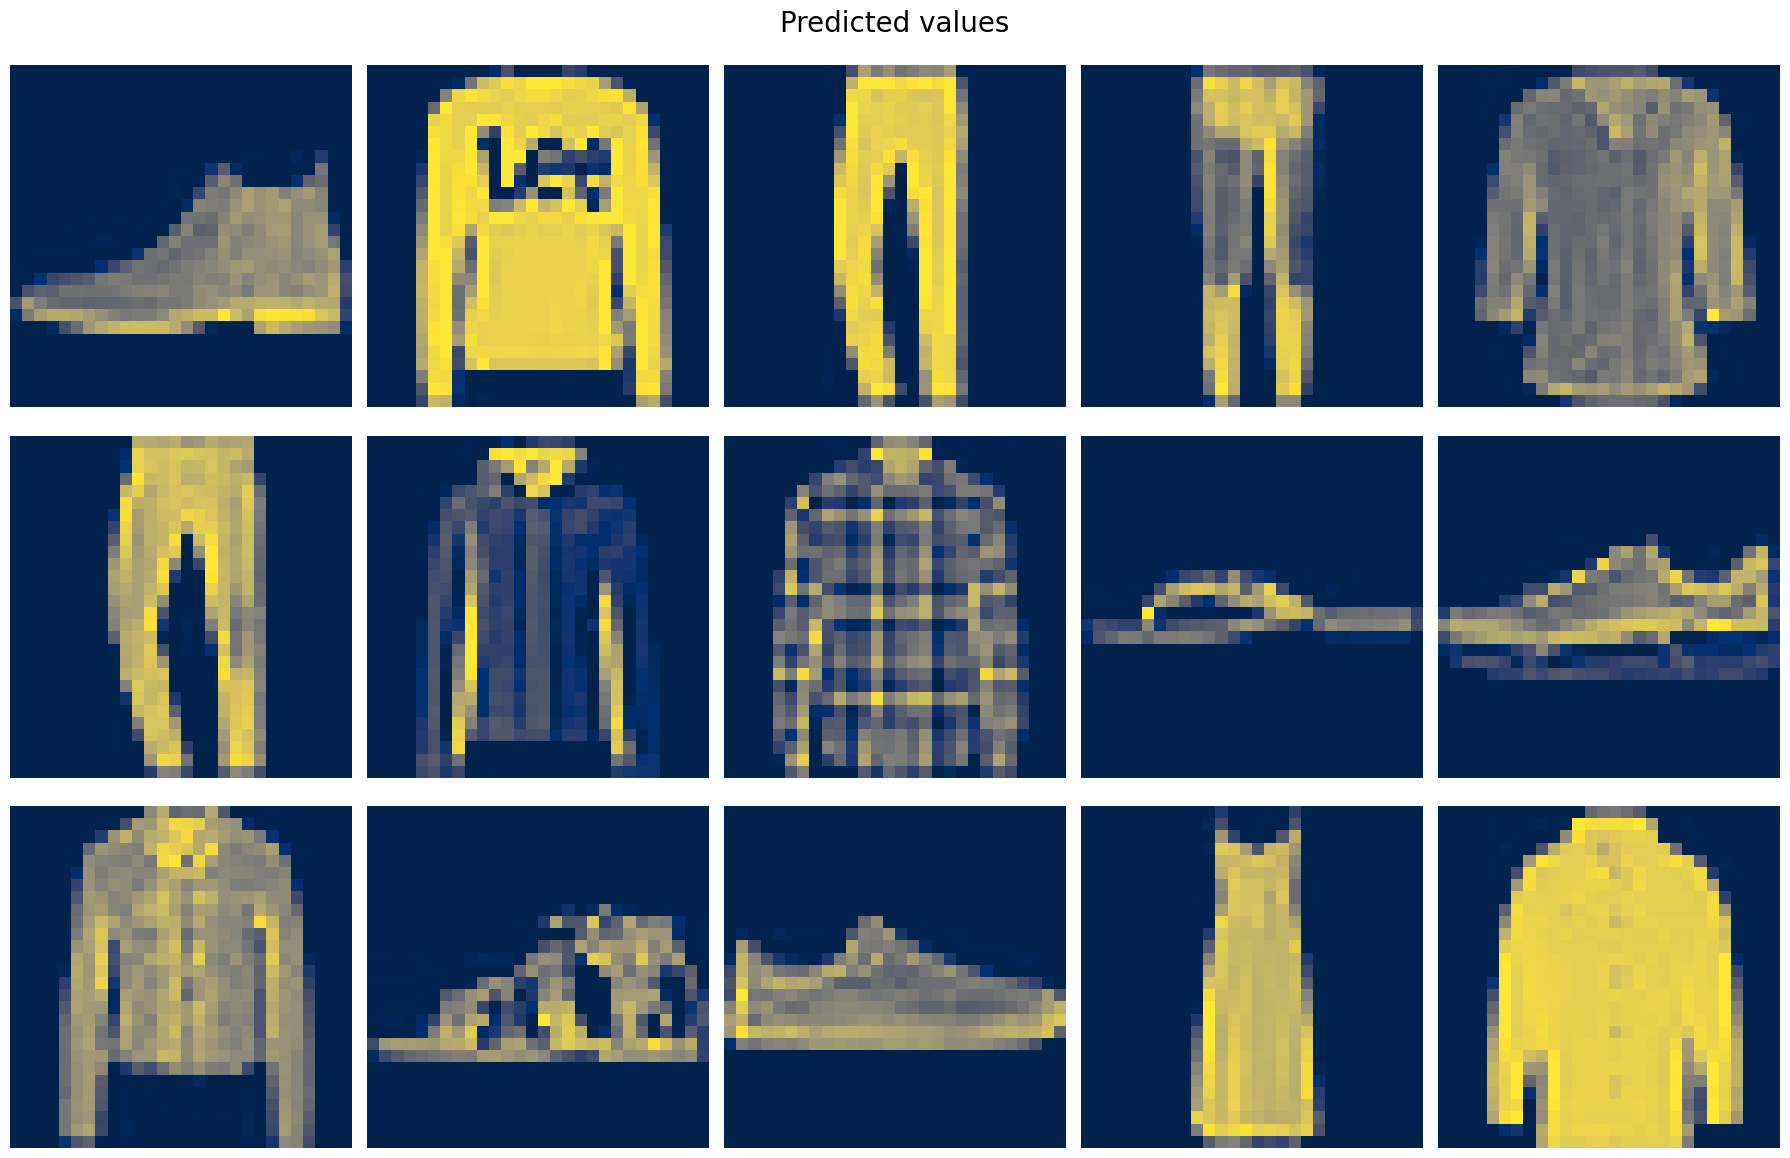

In [13]:
# Make Predictions on test set
predictions = model.predict(test_images[:15])

# Plot predictions
fig, ax = plt.subplots(figsize=(18, 12))
for i, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, i+1)
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=20)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')
plt.tight_layout()
plt.show()

In [14]:
# Interprete the prediction
predicted_class = np.argmax(predictions, axis=1)
predicted_probability = np.max(predictions, axis= 1) *100 # Convert to percentage

# Print the predicted classes and probabilities for each image
for i, (pred_class, pred_prob) in enumerate(zip(predicted_class, predicted_probability)):
    print(f' Predicted class: {pred_class}, Probability: {pred_prob:.2f}%')

 Predicted class: 9, Probability: 97.17%
 Predicted class: 2, Probability: 99.78%
 Predicted class: 1, Probability: 100.00%
 Predicted class: 1, Probability: 100.00%
 Predicted class: 6, Probability: 56.27%
 Predicted class: 1, Probability: 100.00%
 Predicted class: 4, Probability: 96.50%
 Predicted class: 6, Probability: 83.06%
 Predicted class: 5, Probability: 98.08%
 Predicted class: 7, Probability: 99.97%
 Predicted class: 4, Probability: 97.77%
 Predicted class: 5, Probability: 99.02%
 Predicted class: 7, Probability: 52.10%
 Predicted class: 3, Probability: 99.93%
 Predicted class: 4, Probability: 89.72%
